In [11]:
using DifferentialEquations
using Random
using DataFrames
using Distributions

In [12]:
function sir(beta,gamma,N,S0,I0,R0,tf)
    t = 0
    S = S0
    I = I0
    R = R0
    ta= Float64[]
    Sa= Float64[]
    Ia= Float64[]
    Ra= Float64[]
    while t < tf
        push!(ta,t)
        push!(Sa,S)
        push!(Ia,I)
        push!(Ra,R)
        pf1 = beta*S*I
        pf2 = gamma*I
        pf = pf1+pf2
        dt = rand(Exponential(1/pf))
        t = t+dt
        if t>tf
            break
        end
        ru = rand()
        if ru<(pf1/pf)
            S=S-1
            I=I+1
        else
            I=I-1
            R=R+1
        end
    end
    results = DataFrame()
    results[:time] = ta
    results[:S] = Sa
    results[:I] = Ia
    results[:R] = Ra
    return(results)
end


sir (generic function with 1 method)

In [13]:
Random.seed!(42);

In [14]:
sir_out = sir(0.1/1000,0.05,1000,999,1,0,200);

In [15]:
head_size = 6
first(sir_out,head_size)

6×4 DataFrame
│ Row │ time    │ S       │ I       │ R       │
│     │ Float64 │ Float64 │ Float64 │ Float64 │
├─────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ 0.0     │ 999.0   │ 1.0     │ 0.0     │
│ 2   │ 5.37975 │ 998.0   │ 2.0     │ 0.0     │
│ 3   │ 5.89318 │ 997.0   │ 3.0     │ 0.0     │
│ 4   │ 8.47182 │ 997.0   │ 2.0     │ 1.0     │
│ 5   │ 8.61118 │ 996.0   │ 3.0     │ 1.0     │
│ 6   │ 16.7678 │ 995.0   │ 4.0     │ 1.0     │

In [22]:
using StatPlots

┌ Info: Precompiling StatPlots [60ddc479-9b66-56df-82fc-76a74619b69c]
└ @ Base loading.jl:1192


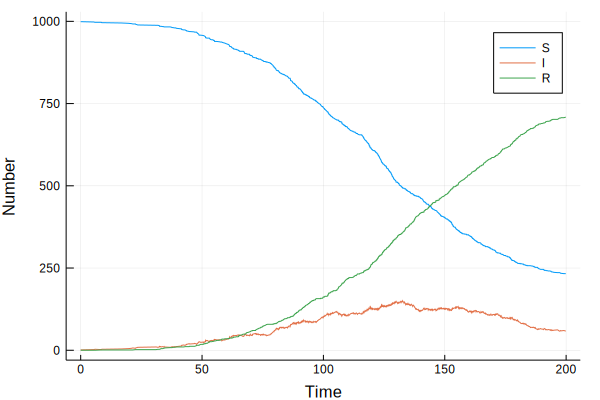

In [23]:
@df sir_out plot(:time, [:S :I :R], xlabel="Time",ylabel="Number")